# BabyFat Data

### Hongzhi Liu, Lixia Yi, Yanran Wang, Jianmin Chen

CHECKLIST:
1. SELECT 1-2 MODELS TO EXPLAIN
2. TEST ON HOW TO INCLUDE PLOTS AND R FILES
3. ESTABLISH A FRAMEWORK FOR OUR PRESENTATION (THE SLIDES IN CLASS COULD SERVE AS A GOOD REFERENCE


In [ ]:
### Part 1 Data Background and EDA
### Part 2 Multi-linear regression and diagnostics
### Part 3 Model-selection
### Part 4 Result interpretation and limits

Part 1 Data Background and EDA

The body fat data set contains 252 records for men on percentage of body fat, body density, age, weight, height,
and ten body circumference measurements. The data was  generated in lab during 1980s. One thing we discovered is 
that the percentage of body fat here is no the original one given in the 1980s set. Almost all values are slightly
larger than the previous version.


First, we use raw data set to detect abnormal points. And we will pay more attention to these points.
There are 3 rules that we used to detect abnormal points:
(1)point with impossible values: 182(Bodyfat),216(Bodyfat),42(Height)
(2)point differ too much between 2 measurement of body component: 96
(3)extreme values: 79,39,31.(Outlier candidate points)


In [5]:
data <- read.csv(file = "BodyFat.csv")
data <- data[, -c(1)] #delete the index of instances
data.1=data[-c(182,216,96,42),-c(2)] #delete points with no substitue
dim(data.1)

[1] 248  15

In [ ]:
EDA: following is a corrplot showing the Pearson correlation coefficient between the Y and X. 
From the plots,..........

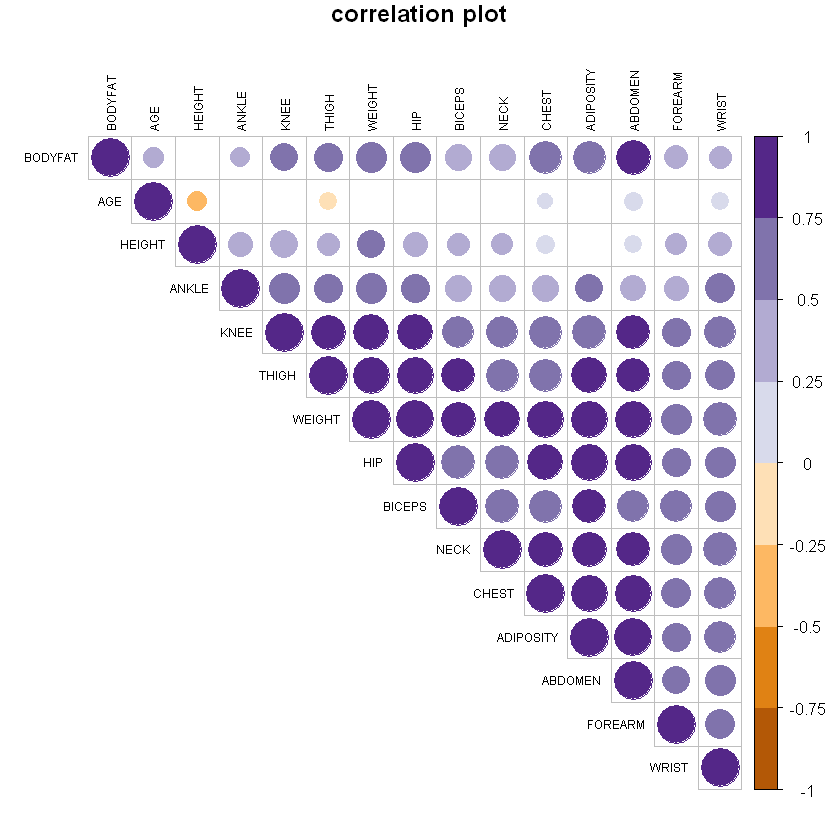

In [6]:
library('corrplot')
library("RColorBrewer")
M <- cor(data.1)
cor.mtest <- function(mat, ...) {
  mat <- as.matrix(mat)
  n <- ncol(mat)
  p.mat<- matrix(NA, n, n)
  diag(p.mat) <- 0
  for (i in 1:(n - 1)) {
    for (j in (i + 1):n) {
      tmp <- cor.test(mat[, i], mat[, j], ...)
      p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
    }
  }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat)
  p.mat
}
# matrix of the p-value of the correlation
p.mat <- cor.mtest(data.1)
corrplot(M, type="upper", order="hclust",col=brewer.pal(n=8, name="PuOr"),
         tl.col="black",sig.level = 0.01,p.mat=p.mat,insig = "blank",
         title="correlation plot",tl.cex=0.6,mar=c(0,0,1,0))


In [ ]:
Add some other plot or EDA

Part 2 Multi-linear regression and diagnostics
We first fit a multi-linear regression on all variables and carry out model diagnostics.
(1)remove high influencial/leverage point 39,86,221,31,36,41
rule:leverage>4/(n-p), one each time(stop at point 86)
rule:no extreme values on other independent variables: 31,41,79


Call:
lm(formula = BODYFAT ~ ., data = data.1)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.165  -2.644  -0.105   2.837   9.439 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -33.47318   37.86454  -0.884  0.37759    
AGE           0.05974    0.03015   1.981  0.04872 *  
WEIGHT       -0.12863    0.10516  -1.223  0.22252    
HEIGHT        0.24642    0.53253   0.463  0.64399    
ADIPOSITY     0.43367    0.78407   0.553  0.58072    
NECK         -0.42956    0.21879  -1.963  0.05079 .  
CHEST        -0.04924    0.10066  -0.489  0.62521    
ABDOMEN       0.86922    0.08623  10.081  < 2e-16 ***
HIP          -0.23010    0.13818  -1.665  0.09721 .  
THIGH         0.24027    0.13781   1.744  0.08256 .  
KNEE          0.03011    0.23240   0.130  0.89702    
ANKLE         0.13065    0.20981   0.623  0.53410    
BICEPS        0.16984    0.16105   1.055  0.29272    
FOREARM       0.40152    0.18662   2.152  0.03246 *  
WRIST        -1.49498    0.49885 

AGE     WEIGHT     HEIGHT  ADIPOSITY       NECK      CHEST    ABDOMEN 
  2.267667 144.968284  28.635165 120.353780   4.339513  10.710386  12.880707 
       HIP      THIGH       KNEE      ANKLE     BICEPS    FOREARM      WRIST 
 14.614912   7.904463   4.755355   1.967941   3.684286   2.194646   3.286698

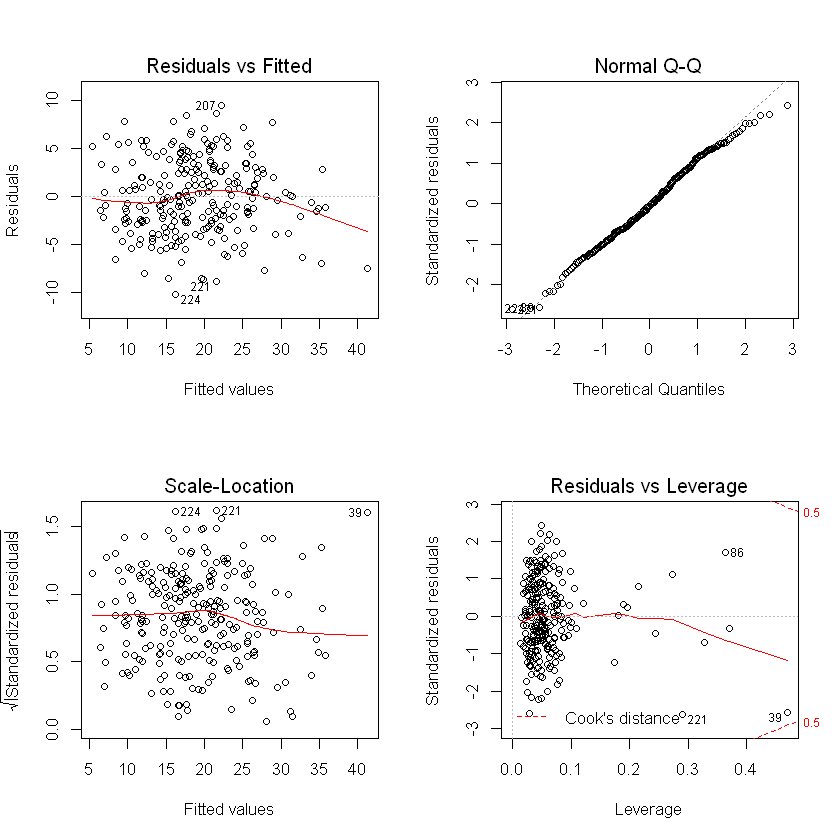

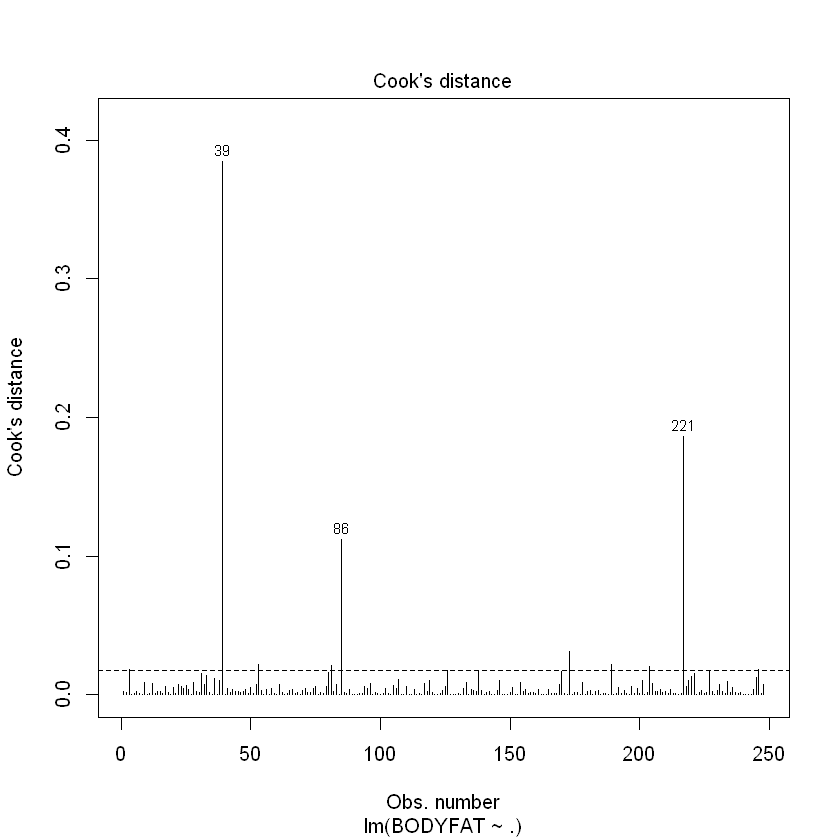


No Studentized residuals with Bonferonni p < 0.05
Largest |rstudent|:
     rstudent unadjusted p-value Bonferonni p
224 -2.529713           0.012097           NA

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
224,6.1,1.0874,55,142.25,67.25,22.2,35.2,92.7,82.8,91.9,54.4,35.2,22.5,29.4,26.8,17


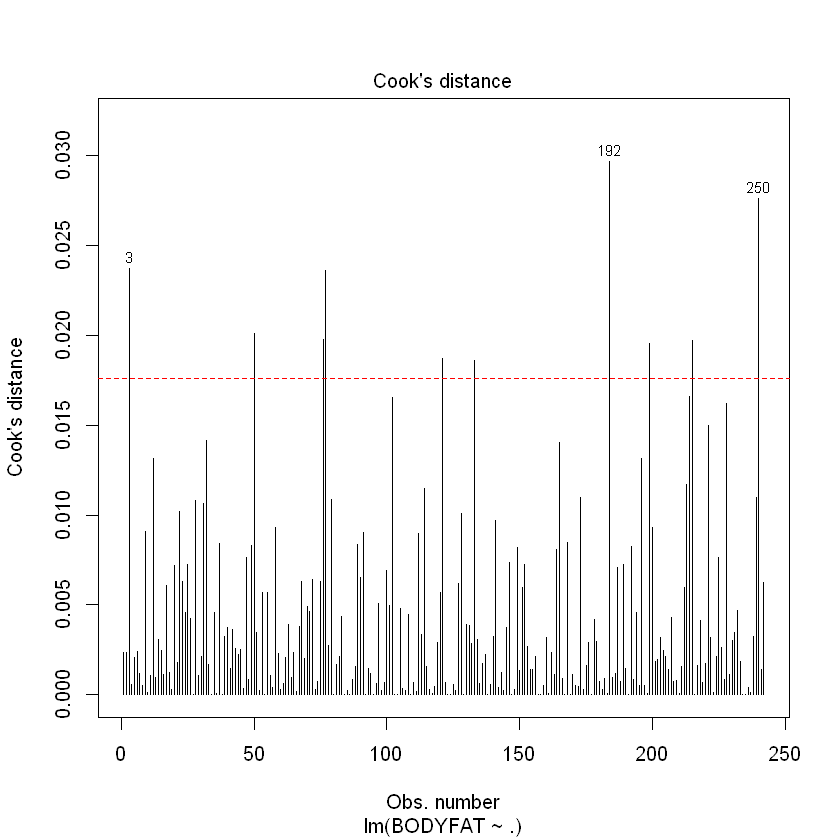

In [8]:
model.raw <- lm(BODYFAT ~ ., data = data.1)
require(car)    #I change the order of residuals plot and vif calculation here
vif(model.raw)
par(mfrow = c(2,2))
plot(model.raw)
par(mfrow = c(1,1))
plot(model.raw, which=4)
abline( h = 4/(248-15),lty=2 )
data.2 = data[-c(182,216,96,42,39,221,86,31,41,79),-2]   #points differ
model.raw2 <- lm(BODYFAT ~ ., data = data.2)
plot(model.raw2, which=4)
abline( h = 4/(242-15),lty=2,col=2)
outlierTest(model.raw2)
data[224,]  #suspected outlier, but do not delete at 5%

(2)check the assumptions of the linear model
a.independent assumption
b.homescedesticity assumption
c.linear form assumption
All these assumptions are not violate. Except that in the residuals plot of Height vs Residuals, there is some kind of quadratic form.

In [ ]:
durbinWatsonTest(model.raw2)  #test for independence
ncvTest(model.raw2)   #test for homescedesticity
require(gvlma)
gvlma(model.raw2)    #test for linear form
plot(data.2$HEIGHT,res)   #plot for linear form

In [9]:
We use the multilinear regression model to help delete outliers. However, there is heavy multicolinearity in the model.
Only variable AGE, HEIGHT, ABDOMEN and WRIST is significant at 0.1 level. We need to do model select.


Call:
lm(formula = BODYFAT ~ ., data = data.2)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6030 -2.8598 -0.1189  2.6759  8.9529 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -72.45248   46.04924  -1.573   0.1170    
AGE           0.05873    0.03059   1.920   0.0561 .  
WEIGHT       -0.22563    0.12948  -1.743   0.0828 .  
HEIGHT        0.80415    0.61909   1.299   0.1953    
ADIPOSITY     1.38081    0.87991   1.569   0.1180    
NECK         -0.31216    0.22179  -1.407   0.1607    
CHEST        -0.11973    0.10531  -1.137   0.2568    
ABDOMEN       0.84345    0.08765   9.623   <2e-16 ***
HIP          -0.14822    0.14290  -1.037   0.3007    
THIGH         0.21008    0.13982   1.503   0.1343    
KNEE         -0.07504    0.24971  -0.300   0.7641    
ANKLE         0.03631    0.34614   0.105   0.9166    
BICEPS        0.13606    0.16299   0.835   0.4047    
FOREARM       0.27488    0.19379   1.418   0.1574    
WRIST        -1.34194    0.52973 

Part 3 model selection
Here, our aim is to gain an accurate rule of thumb. Hence, we choose MSE on test set as the objective function to minimize

Part 4 
Based on all the discussions above, ......
(1)a formula of the rule
(2)a interpretation of CI of slope
(3)give a plot of fitted line and the points
(4)limitations: age range(plot), sex(only male), year(the data was gathered over 20 years ago in lab)
(5)unit problem
......